Create surrogate neural population responses during natural behavior trials using reduced populations with parameters chosen based on theoretical considerations.

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal, stats
import sys
import warnings; warnings.filterwarnings("ignore")

from aux import get_seg
from disp import set_plot
from my_torch import skl_fit_ridge

cc = np.concatenate


TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

# ALPHA = 10

In [2]:
LOAD_DIR = f'data/simple/mlv/ma_vary_het'

# Fixed $\tau_a$, heterogeneous $\tau_r$

In [3]:
FPFX_TAU_A = 'ma_slow_int_fast_adapt_tau_a'
fname_tau_as = [fname for fname in os.listdir(LOAD_DIR) if fname.startswith(FPFX_TAU_A)]

tau_as = [float(fname[len(FPFX_TAU_A)+1:-4]) for fname in fname_tau_as]

fname_tau_as = np.array(fname_tau_as)[np.argsort(tau_as)]
tau_as = sorted(tau_as)

r2_train_mns = {targ: [] for targ in TARGS}
r2_test_mns = {targ: [] for targ in TARGS}

r2_train_sems = {targ: [] for targ in TARGS}
r2_test_sems = {targ: [] for targ in TARGS}

for fname in fname_tau_as:
    
    data = np.load(os.path.join(LOAD_DIR, fname), allow_pickle=True)[0]
    
    for targ in TARGS:
        r2_train_mns[targ].append(data['R2_TRAIN'][targ].mean())
        r2_test_mns[targ].append(data['R2_TEST'][targ].mean())
        
        r2_train_sems[targ].append(stats.sem(data['R2_TRAIN'][targ]))
        r2_test_sems[targ].append(stats.sem(data['R2_TEST'][targ]))

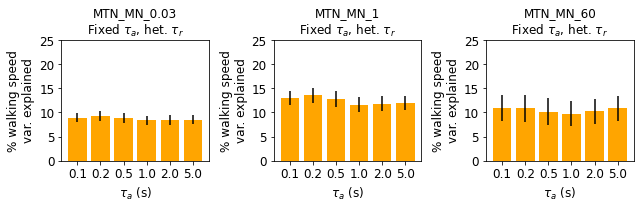

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), tight_layout=True)
for targ, ax in zip(TARGS, axs):
#     ax.bar(np.arange(len(tau_as)), r2_train_mns[targ], align='edge', width=-.4, color='r',)
    ax.bar(
        np.arange(len(tau_as)),
        100*np.array(r2_test_mns[targ]), yerr=100*np.array(r2_test_sems[targ]),
        align='center', width=.8, color='orange')
    
    set_plot(
        ax,
        y_lim=(0, 25),
        x_label=r'$\tau_a$ (s)', x_ticks=range(len(tau_as)), x_tick_labels=tau_as,
        y_label='% walking speed\nvar. explained',
        title=f'{targ}\n' + r'Fixed $\tau_a$, het. $\tau_r$')
    
fig.savefig('ms/fig_2_fmtn_var_xpl_fixed_tau_a.svg')

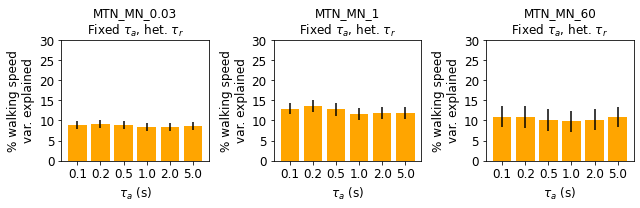

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), tight_layout=True)
for targ, ax in zip(TARGS, axs):
#     ax.bar(np.arange(len(tau_as)), r2_train_mns[targ], align='edge', width=-.4, color='r',)
    ax.bar(
        np.arange(len(tau_as)),
        100*np.array(r2_test_mns[targ]), yerr=100*np.array(r2_test_sems[targ]),
        align='center', width=.8, color='orange')
    
    set_plot(
        ax,
        y_lim=(0, 30),
        x_label=r'$\tau_a$ (s)', x_ticks=range(len(tau_as)), x_tick_labels=tau_as,
        y_label='% walking speed\nvar. explained',
        title=f'{targ}\n' + r'Fixed $\tau_a$, het. $\tau_r$')
    
fig.savefig('supp/fig_2_fmtn_var_xpl_fixed_tau_a.svg')

# Fixed $\tau_r$, heterogeneous $\tau_a$

In [6]:
FPFX_TAU_R = 'ma_slow_int_fast_adapt_tau_r'
fname_tau_rs = [fname for fname in os.listdir(LOAD_DIR) if fname.startswith(FPFX_TAU_R)]

tau_rs = [int(fname[len(FPFX_TAU_R)+1:-4]) for fname in fname_tau_rs]

fname_tau_rs = np.array(fname_tau_rs)[np.argsort(tau_rs)]
tau_rs = sorted(tau_rs)

r2_train_mns = {targ: [] for targ in TARGS}
r2_test_mns = {targ: [] for targ in TARGS}

r2_train_sems = {targ: [] for targ in TARGS}
r2_test_sems = {targ: [] for targ in TARGS}

for fname in fname_tau_rs:
    
    data = np.load(os.path.join(LOAD_DIR, fname), allow_pickle=True)[0]
    
    for targ in TARGS:
        r2_train_mns[targ].append(data['R2_TRAIN'][targ].mean())
        r2_test_mns[targ].append(data['R2_TEST'][targ].mean())
        
        r2_train_sems[targ].append(stats.sem(data['R2_TRAIN'][targ]))
        r2_test_sems[targ].append(stats.sem(data['R2_TEST'][targ]))

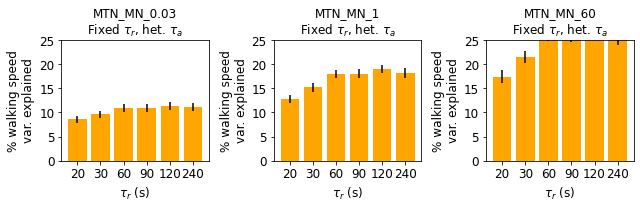

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), tight_layout=True)
for targ, ax in zip(TARGS, axs):
#     ax.bar(np.arange(len(tau_rs)), r2_train_mns[targ], align='edge', width=-.4, color='r',)
    ax.bar(
        np.arange(len(tau_rs)),
        100*np.array(r2_test_mns[targ]), yerr=100*np.array(r2_test_sems[targ]),
        align='center', width=.8, color='orange')
    
    set_plot(
        ax,
        y_lim=(0, 25),
        x_label=r'$\tau_r$ (s)', x_ticks=range(len(tau_rs)), x_tick_labels=tau_rs,
        y_label='% walking speed\nvar. explained',
        title=f'{targ}\n' + r'Fixed $\tau_r$, het. $\tau_a$')
    
fig.savefig('ms/fig_2_fmtn_var_xpl_fixed_tau_r.svg')

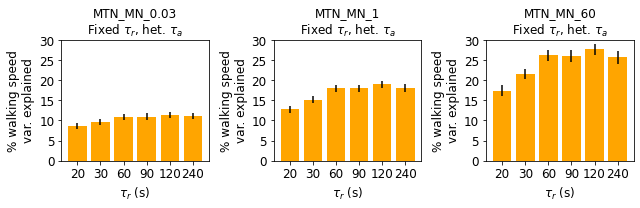

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), tight_layout=True)
for targ, ax in zip(TARGS, axs):
#     ax.bar(np.arange(len(tau_rs)), r2_train_mns[targ], align='edge', width=-.4, color='r',)
    ax.bar(
        np.arange(len(tau_rs)),
        100*np.array(r2_test_mns[targ]), yerr=100*np.array(r2_test_sems[targ]),
        align='center', width=.8, color='orange')
    
    set_plot(
        ax,
        y_lim=(0, 30),
        x_label=r'$\tau_r$ (s)', x_ticks=range(len(tau_rs)), x_tick_labels=tau_rs,
        y_label='% walking speed\nvar. explained',
        title=f'{targ}\n' + r'Fixed $\tau_r$, het. $\tau_a$')
    
fig.savefig('supp/fig_2_fmtn_var_xpl_fixed_tau_r.svg')